### Assignment - Facebook

The objective of the proposed framework is to study and analyse the differences in the way users
are using Facebook based on their gender, age-group, etc. and Identify a pattern out of it

###### Importing important libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\\Users\\Monali\\OneDrive\\Desktop\\Case Study-DS\\Facebook')

In [3]:
os.getcwd()

'C:\\Users\\Monali\\OneDrive\\Desktop\\Case Study-DS\\Facebook'

### Loading the Data

In [4]:
FB = pd.read_excel('facebook user data.xlsx')

In [5]:
FB.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [6]:
FB.shape

(99003, 15)

In [7]:
FB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [40]:
FB.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900100e+04,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000
mean,1.597042e+06,37.279048,14.530550,1975.720952,6.283361,537.887375,196.352885,107.453702,156.080646,142.691448,106.118272,84.121948,49.962314,58.569459
std,3.440585e+05,22.588436,9.015595,22.588436,3.529621,457.649874,387.307808,188.788658,572.286274,1387.933546,445.257265,839.897864,285.562930,601.422396
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298804e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895741e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


-Average age of facebook user is 37.
-Users use web and mobile both to use facebook (Based on mobile_likes and web_likes Data)

### Missing Value analysis

In [9]:
FB.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

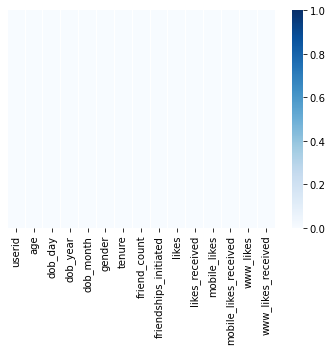

In [10]:
#Visualization of missing values with heatmap
sns.heatmap(FB.isnull(),yticklabels = False,cbar = True, cmap = "Blues",linecolor = "Black")

### Imputation of missing value

As the missing value is categorical, we will impute it with mode.

In [11]:
FB['gender'].mode()

0    male
dtype: object

In [13]:
FB['gender'] = FB['gender'].fillna(FB['gender'].mode()[0])

Although for 'Tenure' mean or median can be used based on data distribution.
If data is screwed median should be used else it can be imputed with mean.
There are 2 missing values in 'Tenure', which can be dropped as it contributes only 0.001 of total data.

In [14]:
FB.dropna(subset = ['tenure'], inplace = True)

In [15]:
FB['gender'].isnull().sum()

0

### Data Visualization

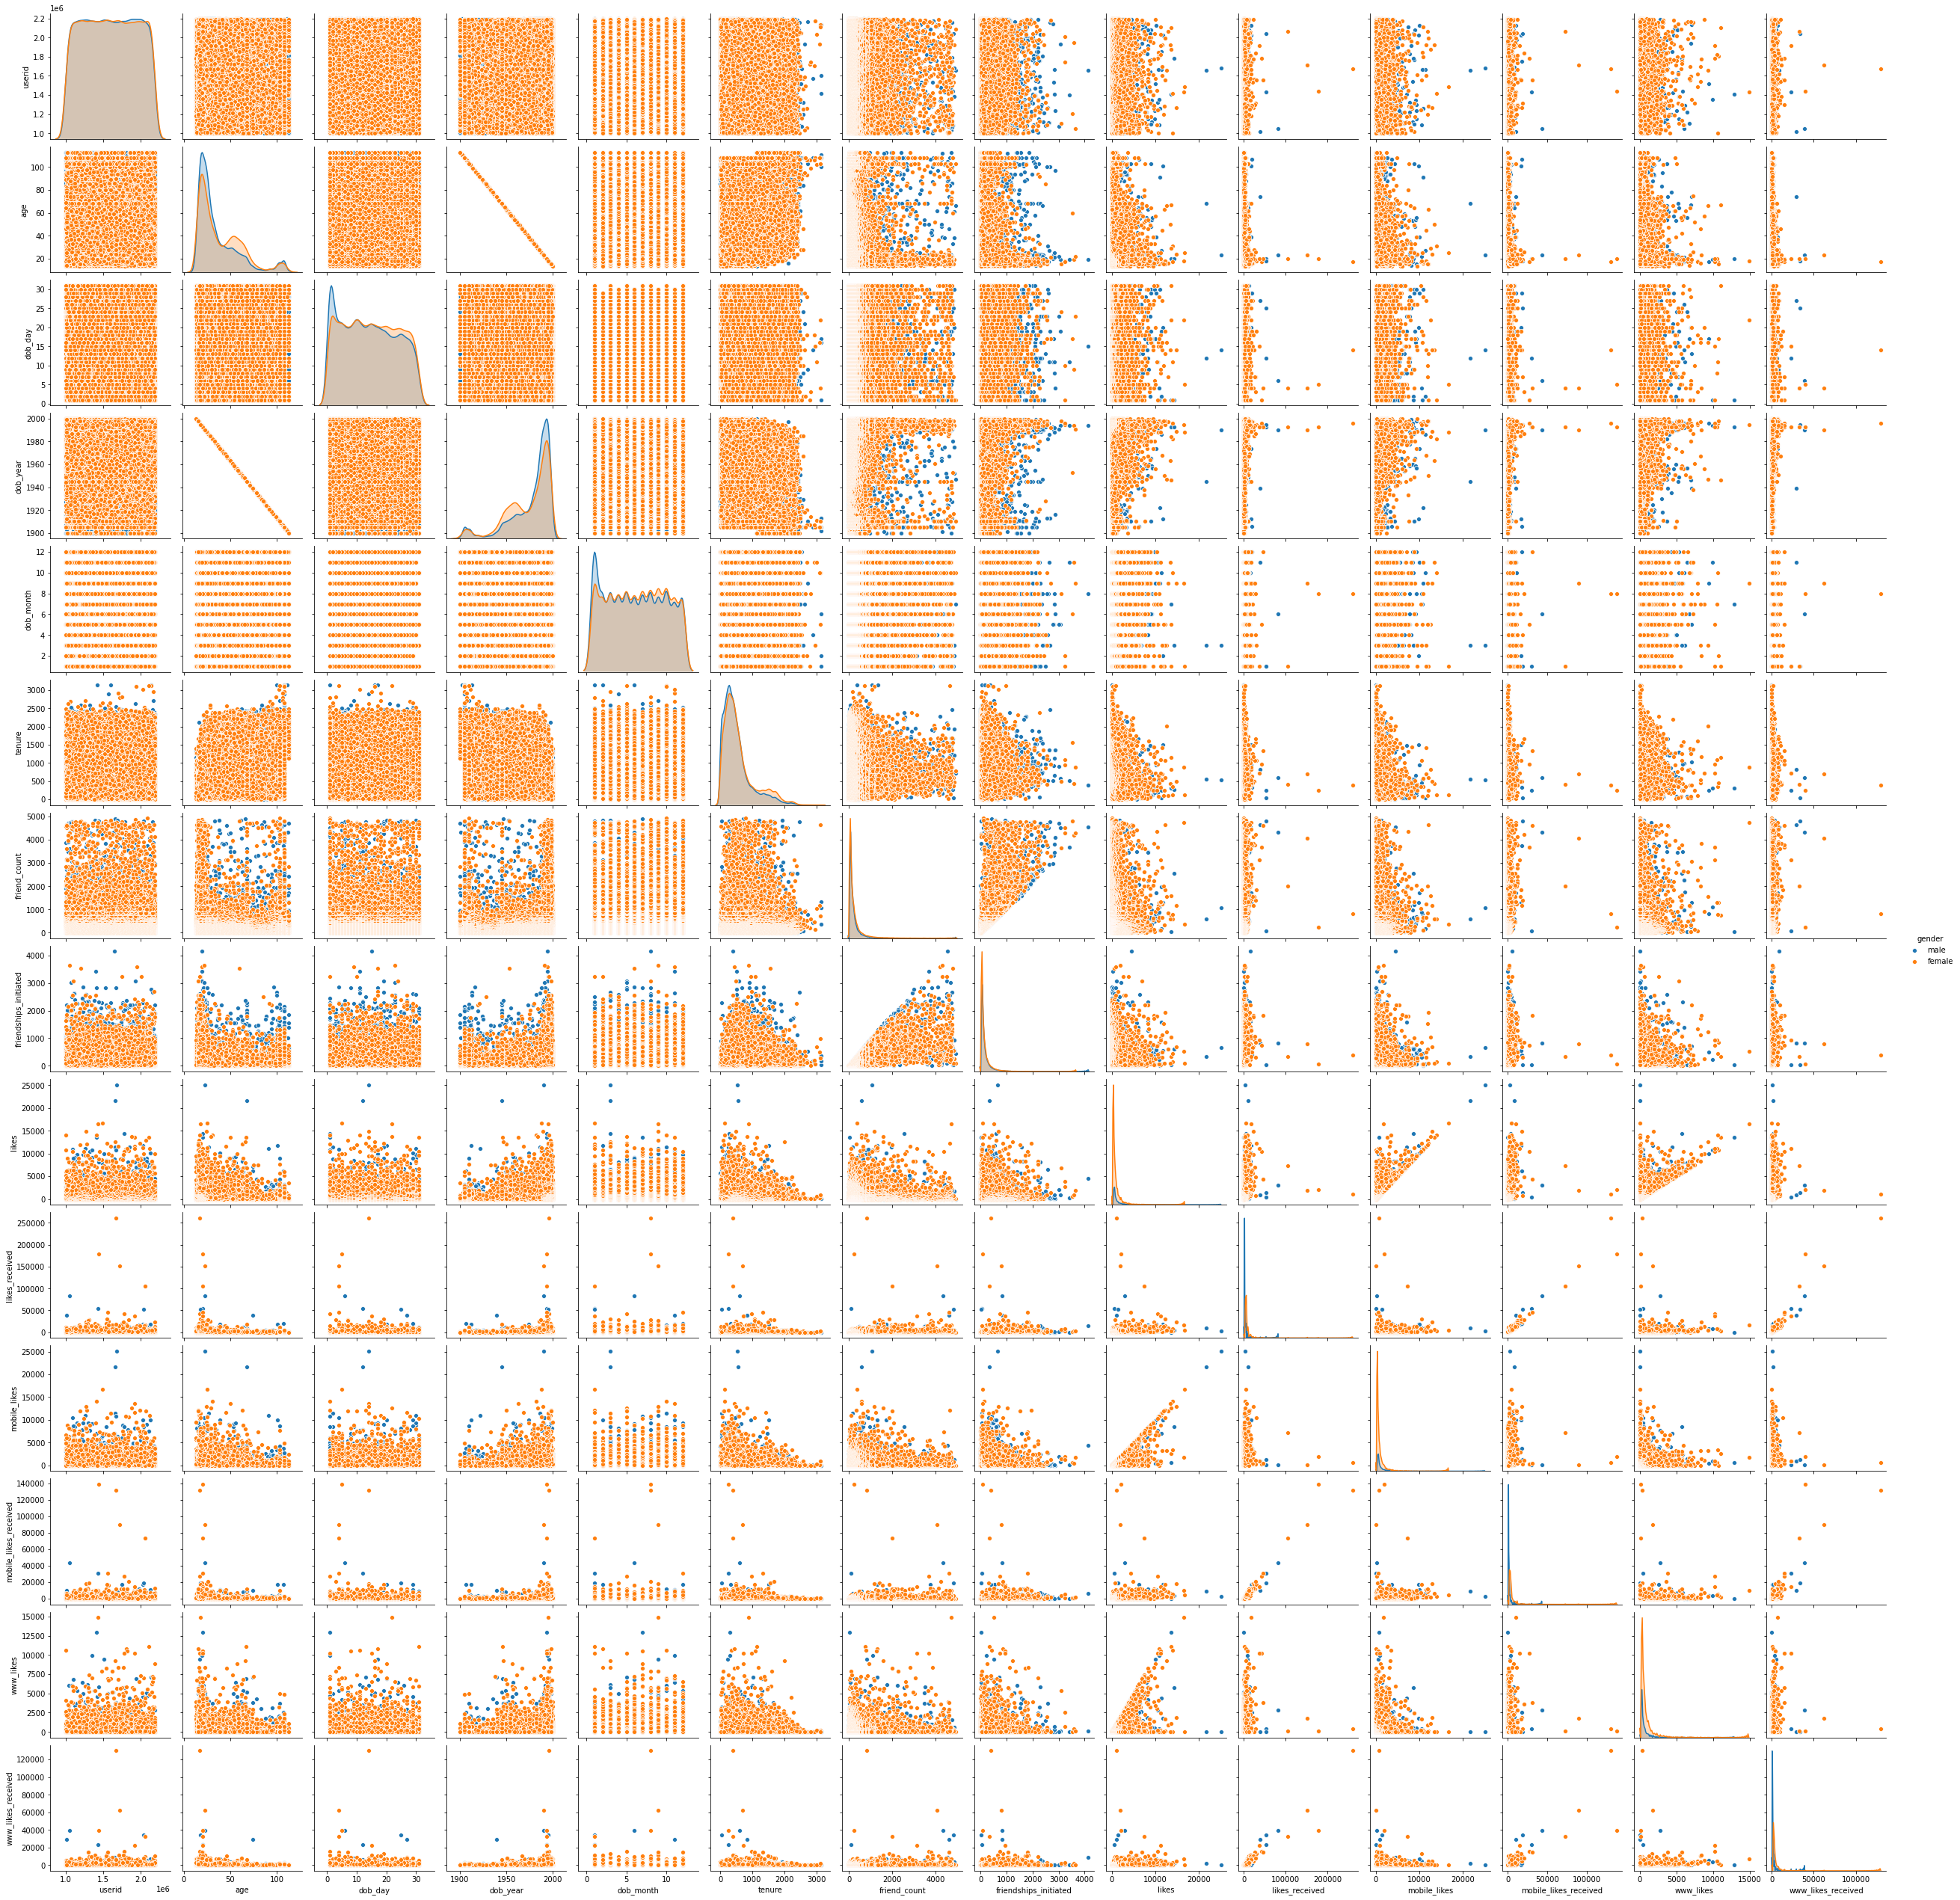

In [16]:
sns.pairplot(FB, hue = 'gender')

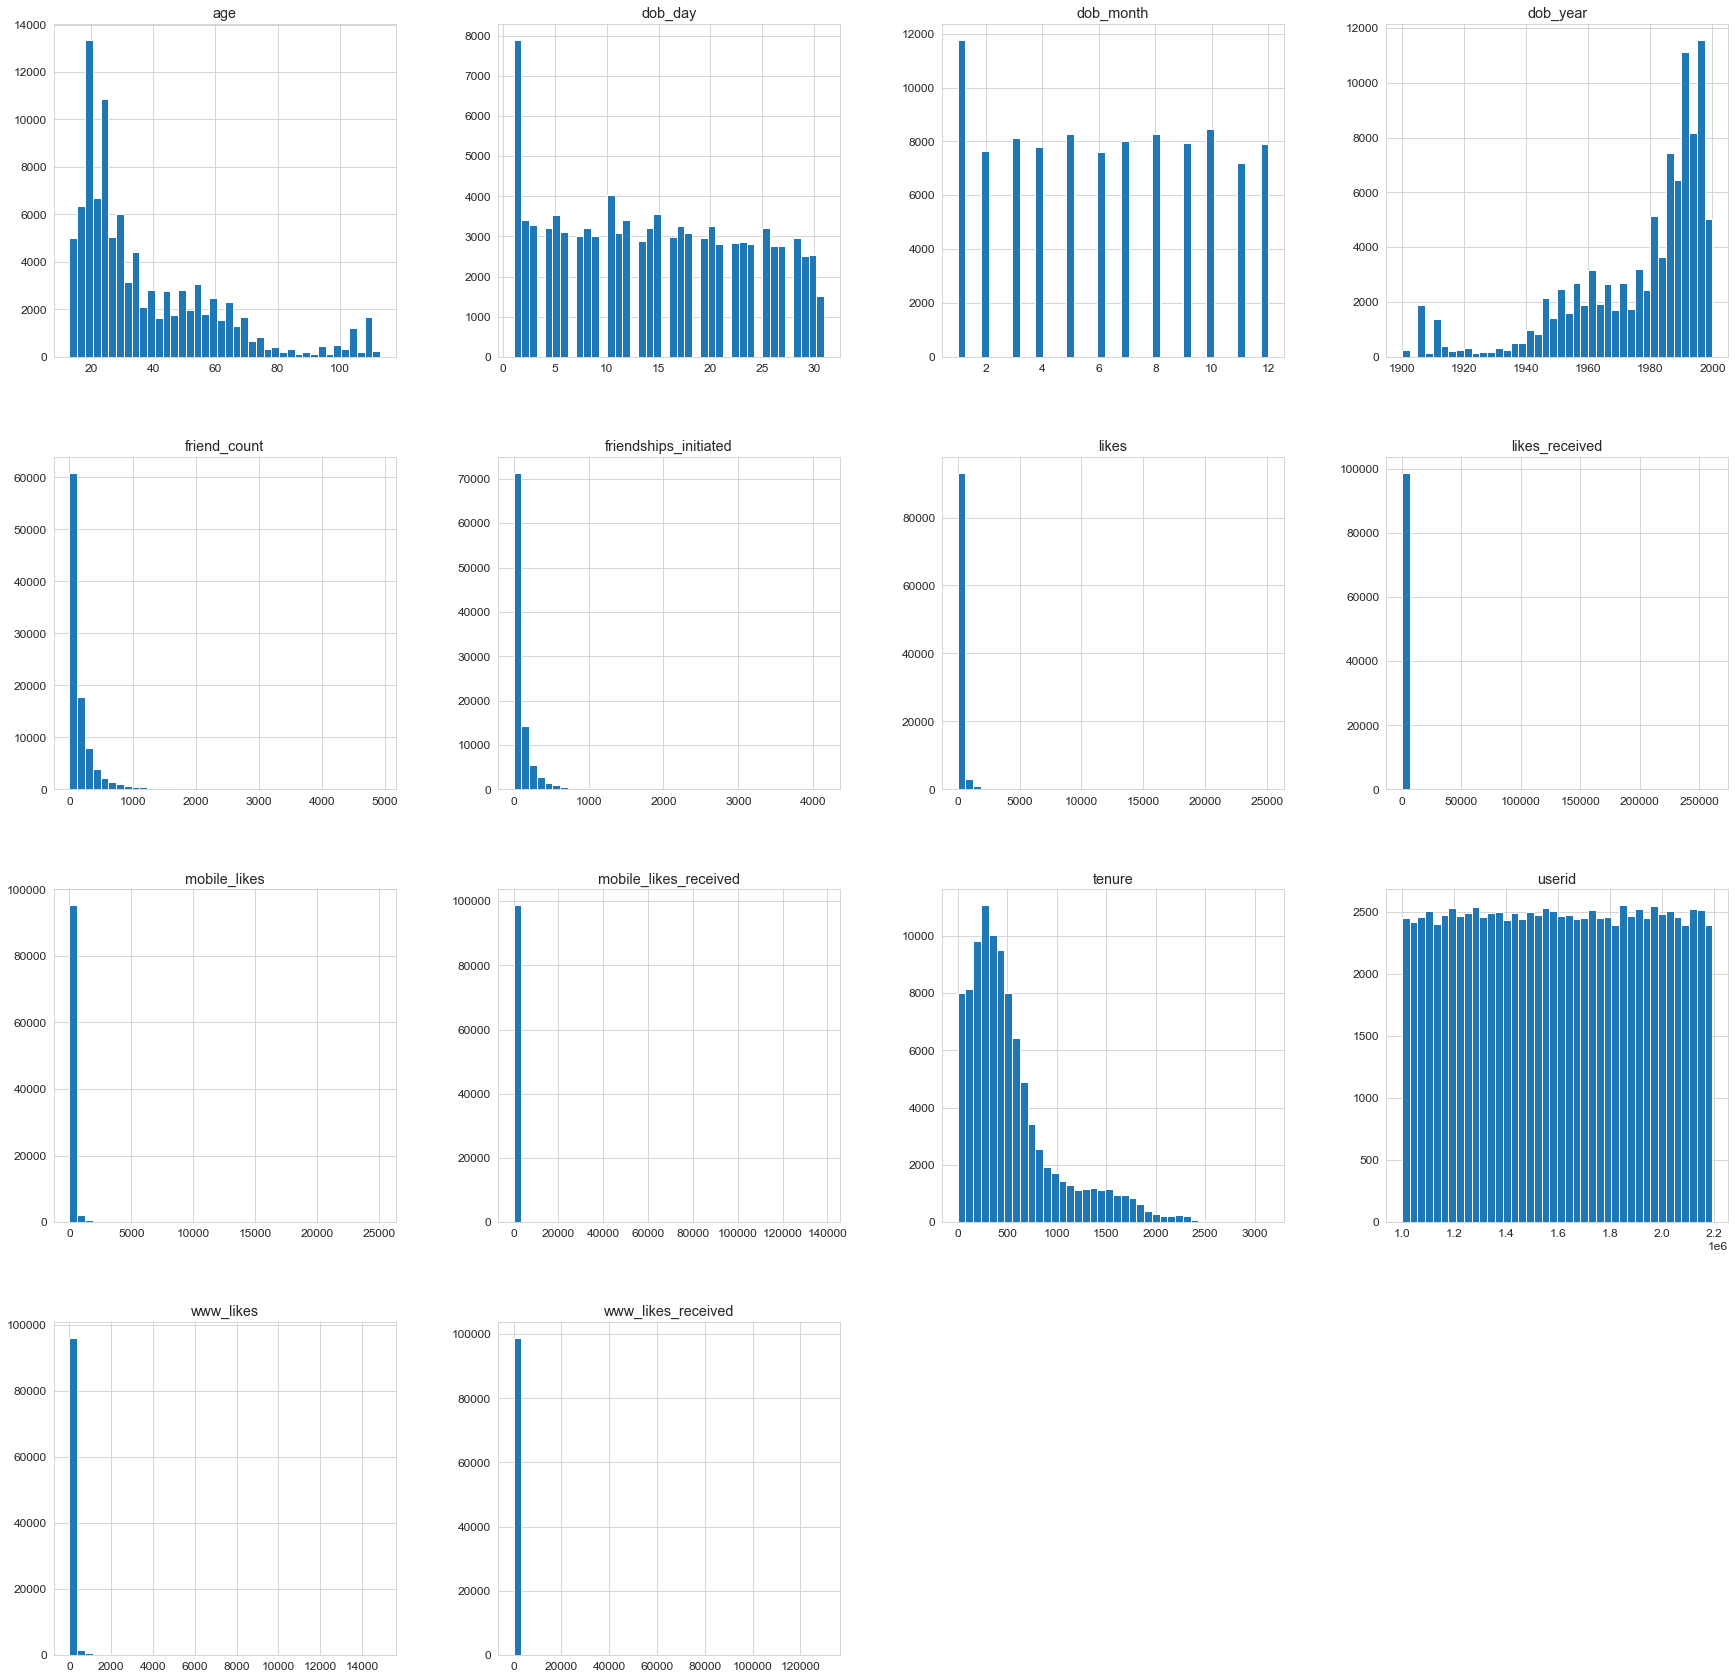

In [17]:
plt.rcParams.update({'font.size': 12})
sns.set_style("whitegrid")
FB.hist(bins=40, figsize=(30, 30));

In [18]:
FB['gender'].value_counts()

male      58749
female    40252
Name: gender, dtype: int64

(array([58749.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 40252.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

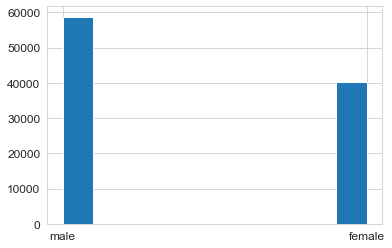

In [19]:
plt.hist(FB['gender'])

### HeatMap/correlation

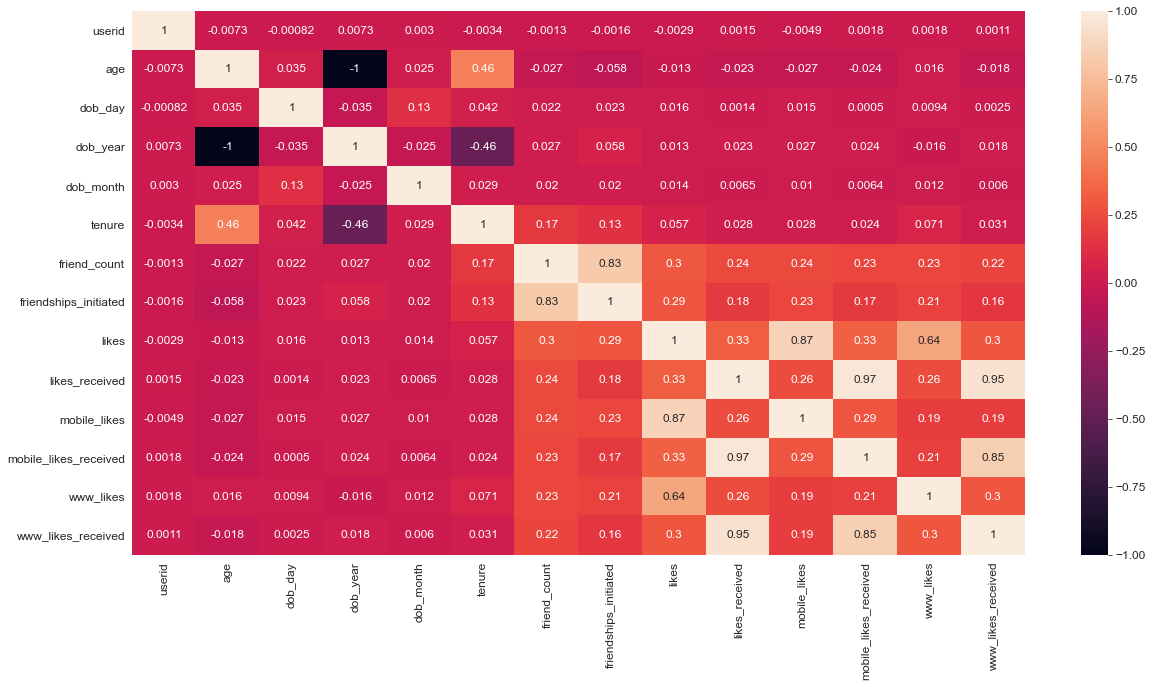

In [20]:
f, ax = plt.subplots(figsize = (20,10))
sns.heatmap(FB.corr(),annot = True)

There is high co-relation between Likes_recieved and www_likes_received and mobile_likes_received and www_likes_received

## Analysis based on number of users

#### Composition of male and female users

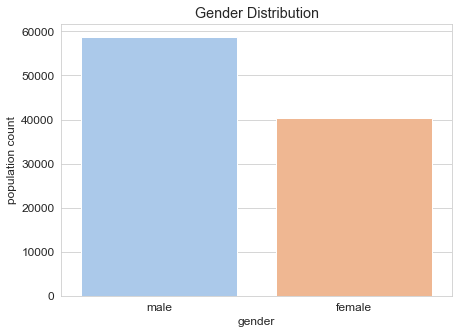

In [21]:
plt.figure(figsize=(7,5))
g = sns.countplot(FB.gender, palette="pastel");
plt.title("Gender Distribution")
plt.xlabel("gender")
plt.ylabel("population count")
plt.show()

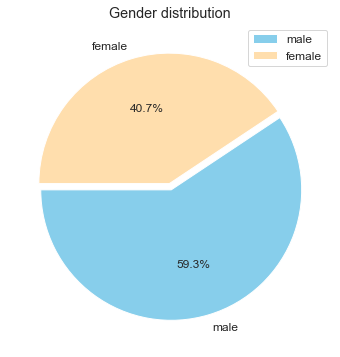

In [22]:
plt.figure(figsize=(12,6))
plt.title("Gender distribution")
g = plt.pie(FB.gender.value_counts(), explode=(0.025,0.025), labels=FB.gender.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

#### Friends Count based on gender

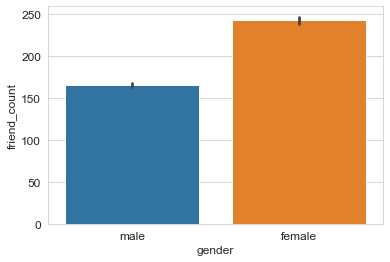

In [23]:
#Females have more friends than males
sns.barplot(x=FB['gender'],y=FB['friend_count'])

#### Friends_initiated based on gender

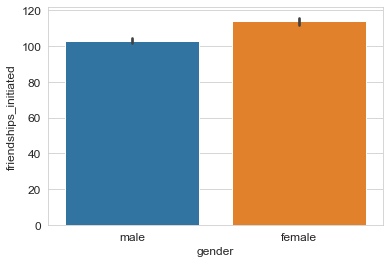

In [24]:
#Females have inititaed more friendships than males
sns.barplot(x=FB['gender'],y=FB['friendships_initiated'])

#### Distribution of tenure across different categories of gender 

In [25]:
tenlabel=['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9']
FB['year_group']=pd.cut(FB.tenure,bins=np.arange(0,3300,365),labels=tenlabel,right=True)

In [26]:
FB

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,year_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,0-1
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,0-1
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,0-1
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,0-1
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,0-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202,1-2
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,0-1
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092,0-1
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756,1-2


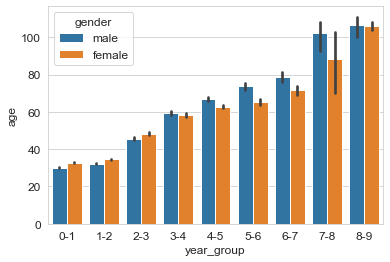

In [27]:
sns.barplot(x=FB['year_group'],y=FB['age'],hue = FB.gender)

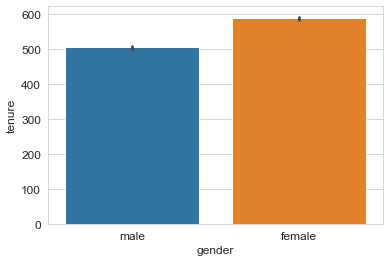

In [28]:
sns.barplot(x=FB['gender'],y=FB['tenure'])

### Analysis based on least active users on facebook

#### Users having no friends

In [29]:
fc=FB.friend_count==0
fc.value_counts()

False    97039
True      1962
Name: friend_count, dtype: int64

#### Users who didn't like any post

In [30]:
Pc=FB.likes==0
Pc.value_counts()

False    76693
True     22308
Name: likes, dtype: int64

#### Users who didn't received any likes

In [31]:
No_likes_received=FB.likes_received==0
No_likes_received.value_counts()

False    74573
True     24428
Name: likes_received, dtype: int64

## Analysis based on accessibility 

Average number of post liked by user based on gender through web vs mobile devices

In [32]:
FB[FB['gender']=='male']['mobile_likes'].mean()

60.348176139168324

In [33]:
FB[FB['gender']=='female']['mobile_likes'].mean()

172.92109708834343

In [34]:
FB[FB['gender']=='male']['www_likes'].mean()

24.490033872916985

In [35]:
FB[FB['gender']=='female']['www_likes'].mean()

87.13986882639372

Average number of likes received by user based on gender through web vs mobile devices

In [36]:
FB[FB['gender']=='male']['mobile_likes_received'].mean()

40.96719944169262

In [37]:
FB[FB['gender']=='female']['mobile_likes_received'].mean()

147.1075971380304

In [38]:
FB[FB['gender']=='male']['www_likes_received'].mean()

27.210863163628318

In [39]:
FB[FB['gender']=='female']['www_likes_received'].mean()

104.33826890589287